<a href="https://colab.research.google.com/github/prajnaraipn7/Eva_Assignment2/blob/master/EVA_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Details
*  Submitted By : Prajna P N
*  Email ID: prajnaneerchal7@gmail.com
*  Alternate Email ID:prajnaraipn@gmail.com
*  References : Rohan Shravan class notes/EIP sessions and Online Tutorials

# **Not an ideal network**



###Detailed explanations of few concepts is in readme.md

In [2]:
# https://keras.io/
#Import the keras after installing the keras [Theano+ Tensorflow -> Keras] Keras is an API , which is built on top of tensorlow and theano
#Here tensorflow 
!pip install -q keras
import keras

Using TensorFlow backend.


#Some of the things I learnt while I did this:


There are two ways to build Keras models: 
*  <b>Sequential</b>
*  <b>Functional</b>

The <b>sequential API</b> allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs. That is layer by layer sharing happens.Here, a layer is connected to its immediate and next layer.
For example, it is not straightforward to define models that may have:
1.   <i>multiple different input sources</i>
2.   <i>produce multiple output destinations</i>
3.   <i>models that re-use layers</i>

Alternatively, the <b> functional API</b> allows you to create models that have a lot more flexibility as you can easily define models where layers connect to more than just the previous and next layers. In fact, you can connect layers to (literally) any other layer. 



##Example for flatten  ...What do you mean by flatten ? is explained below:
![alt text](https://i.stack.imgur.com/Wk8eV.png)

##Convolution

Here a 3,3 kernel is convolving over a 5,5, image to get a output of 3,3 size
![alt text](https://cdn-images-1.medium.com/max/800/1*Fw-ehcNBR9byHtho-Rxbtw.gif)

##2D COnvolution
Here ,the  kernel(3,3) “slides” over the 2D input data, performing an elementwise multiplication with the part of the input it is currently on, and then summing up the results into a single output pixel.
[Here, convolution means element wise multiplication and add]

![alt text](https://cdn-images-1.medium.com/max/800/1*Zx-ZMLKab7VOCQTxdZ1OAw.gif)

In [0]:
#Calling all the gods ;)
#import numpy for all the calculation
import numpy as np
#Keras provides a Sequential model API, It is way of creating a deep learning model where an instance of sequential class is created and we can add layers to it .In simpler terms,it is stack of layers
from keras.models import Sequential
#It is used to flatten the vectors 
# if the output of the previous layer is of shape (32, 3, 3), flatten unstacks all the vector values into a 1-D vector of shape (32*3*3)
#Flatten is a function of keras.layers to flatten the input
from keras.layers import Flatten
#Convolution2D is a function of keras.layers to use as a kernel/filter( as a filtering window) across a 2D image
from keras.layers import Convolution2D
#used to handle numpy arrays and to covert categorical/one hot encoding/dummyfying 
#This will be useful for data layer
from keras.utils import np_utils
#importing mnist dataset to the local
from keras.datasets import mnist

In [4]:
#We are creating train test split after loading the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


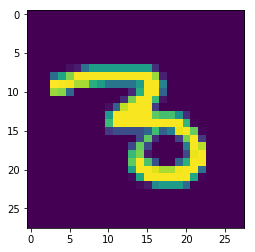

In [5]:
#printing the structure of xtrain[shape of the dataframe]
print (X_train.shape)
#matplotlib is a library which is used for visualizing the data
from matplotlib import pyplot as plt
#to show the plot inline, within the cell
%matplotlib inline
plt.imshow(X_train[30])

In [0]:
#Reshape function is use to reshape the image to 1D or any dimension
#28,28 image size and 1 channel
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [7]:
X_train.shape[0]

60000

In [0]:
#to convert our data type to float32 and normalize our data values to the range [0, 1].
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
#Looking at the label data
#Let's take a look at the labels for the first 10 training samples:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
#one hot encoding..Single array value with class values
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [11]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

##Define Model Architecture

In [12]:
#Importing the activation and Maxpooling function from the Keras Layers 
from keras.layers import Activation, MaxPooling2D

#Declare sequential model
model = Sequential() 
#relu is the activation function used
#We declare the input layer and we have used relu as activation function , so we are convolving 28,28,1 with 3,3 kernel having 32 channels
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))    #GRF -3
#Here we convolve 26,26 image size having 32 channels with 3,3 kernel having 64 channels
model.add(Convolution2D(64, 3, 3, activation='relu'))                           #GRF -5
#We convolve 24,24 image having 64 channel with 3,3 kernel and 128 channels
model.add(Convolution2D(128, 3, 3, activation='relu'))                          #GRF -7

#We perform maxpooling over the previous layer to reduce the resolution of the image [size of the image].So, we have 11,11 image with 128 channels
model.add(MaxPooling2D(pool_size=(2, 2)))                                       #GRF - 14

#We convolve 11 11 image having 128 channel with 3,3 kernel and 256 channels
model.add(Convolution2D(256, 3, 3, activation='relu'))                          #GRF -16
#We convolve 9 9 image having 256 channel with 3,3 kernel  and 512 channels
model.add(Convolution2D(512, 3, 3, activation='relu'))                          #GRF -18
#We convolve 7 7 image having 512 channel with 3,3 kernel and 1024 channels
model.add(Convolution2D(1024, 3, 3, activation='relu'))                         #GRF -20
#We convolve 5 5 image having 51024 channel with 3,3 kernel and 2048 channels
model.add(Convolution2D(2048, 3, 3, activation='relu'))                         #GRF -22 
#We convolve 3 3 image having 2048 channel with 3,3 kernel  and 10 channels
model.add(Convolution2D(10, 3, 3, activation='relu'))                           #GRF -24
#we are flattening into a single vector
model.add(Flatten())
#Softmax function calculates the probabilities distribution of the event over ‘n’ different events. 
#In general way of saying, this function will calculate the probabilities of each target class over all possible target classes. 
#The main advantage of using Softmax is the output probabilities range. The range will 0 to 1, and the sum of all the probabilities will be equal to one. 
model.add(Activation('softmax'))
#shows the model summary
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: U

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

##Compile the Model

Before training a model, you need to configure the learning process[ as in how my model shpould learn], which is done via the <b>compile</b> method.
It receives three arguments:


*   <b>Optimizer</b> : (like rmsprop or adagrad)
*   <b>Loss Function</b> (like:  categorical_crossentropy or mse)
*   <b>A List Of Metrics</b> (like:metrics ="accuracy")

###Explained in detail in readme.md



In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

##Fitting the model
Here we are making our  algorithm learn the relationship between input data and output so that we can predict the future values of the output.
Here, we declare the batch size and number of epochs to train for, then pass in our training data.

###Detailed explanations in readme.md


In [14]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 116s 2ms/step - loss: 1.9059 - acc: 0.1921
Epoch 2/10
60000/60000 [==============================] - 112s 2ms/step - loss: 1.8738 - acc: 0.1952
Epoch 3/10
60000/60000 [==============================] - 112s 2ms/step - loss: 1.8697 - acc: 0.1950
Epoch 4/10
60000/60000 [==============================] - 112s 2ms/step - loss: 1.8682 - acc: 0.1953
Epoch 5/10
60000/60000 [==============================] - 112s 2ms/step - loss: 1.8656 - acc: 0.1951
Epoch 6/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.0681 - acc: 0.1743
Epoch 7/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - a

In [0]:
#We evaluate the model on test set
score = model.evaluate(X_test, Y_test, verbose=0)

In [16]:
#Printing the loss value and the accuracy here The less the loss value better the model it is.It is basically how far the real values are from the predicted ones
print(score)

[2.3025851249694824, 0.098]


In [0]:
#We are predicting the unseen data,X_test
y_pred = model.predict(X_test)

In [18]:
#Print the Predicted Labels and Actual Labels
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


##Why i think the Architecture is bad


*  <b>Use of so many channels and this big number of channels was not required</b>
*   <b>These many layers was not required for convolving</b>
*   <b>Ultimately , too many parameters not essential</b>

###These are the sure ones

##The other Thing I did was that comparision with EIP Assignment 1 and found these comparitions:
*   <b>Relu was not used in the last layer </b>
*   <b>Also, we have not convolved till 1,1 convolution </b>

And I understood these are the contributing factors for architecture being a terrible one





###First Trying with the change by removing relu

In [26]:
from keras.layers import Activation, MaxPooling2D
model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(Convolution2D(1024, 3, 3, activation='relu'))
model.add(Convolution2D(2048, 3, 3, activation='relu'))
model.add(Convolution2D(10,3))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  
/usr/local/

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [28]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.1486 - acc: 0.9533
Epoch 2/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0576 - acc: 0.9839
Epoch 3/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0428 - acc: 0.9879
Epoch 4/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0335 - acc: 0.9903
Epoch 5/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0292 - acc: 0.9919
Epoch 6/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0261 - acc: 0.9931
Epoch 7/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0225 - acc: 0.9936
Epoch 8/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0214 - acc: 0.9941
Epoch 9/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0215 - acc: 0.9946
Epoch 10/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0210 - a

###The accuracy came to 99.4% from 9%

###Trying with the change by removing relu and 1,1 convolution .

In [40]:
from keras.layers import Activation, MaxPooling2D
model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(Convolution2D(1024, 3, 3, activation='relu'))
model.add(Convolution2D(32,5,5,activation='relu'))
model.add(Convolution2D(10,1))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_107 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  
/usr/local/

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [42]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 47s 781us/step - loss: 0.1605 - acc: 0.9514
Epoch 2/10
60000/60000 [==============================] - 45s 747us/step - loss: 0.0493 - acc: 0.9856
Epoch 3/10
60000/60000 [==============================] - 45s 744us/step - loss: 0.0364 - acc: 0.9890
Epoch 4/10
60000/60000 [==============================] - 45s 745us/step - loss: 0.0279 - acc: 0.9919
Epoch 5/10
60000/60000 [==============================] - 45s 744us/step - loss: 0.0246 - acc: 0.9929
Epoch 6/10
60000/60000 [==============================] - 44s 740us/step - loss: 0.0175 - acc: 0.9944
Epoch 7/10
60000/60000 [==============================] - 45s 747us/step - loss: 0.0186 - acc: 0.9949
Epoch 8/10
60000/60000 [==============================] - 45s 742us/step - loss: 0.0162 - acc: 0.9954
Epoch 9/10
60000/60000 [==============================] - 44s 742us/step - loss: 0.0131 - acc: 0.9964
Epoch 10/10
60000/60000 [==============================] - 44s 738us/step - loss: 

###The accuracy improved from 9% to 99.6%